In [1]:
%matplotlib inline

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolplanck')

cenmask = halocat.halo_table['halo_upid'] == -1
halos = halocat.halo_table[cenmask]
mass_mask0 = (halos['halo_mpeak'] >= 10**11.25) & (halos['halo_mpeak'] < 10**11.5)
mass_mask1 = (halos['halo_mpeak'] >= 10**11.9) & (halos['halo_mpeak'] < 10**12.1)
mass_mask2 = (halos['halo_mpeak'] >= 10**12.8) & (halos['halo_mpeak'] < 10**13.2)
mass_mask3 = (halos['halo_mpeak'] >= 10**13.75) & (halos['halo_mpeak'] < 10**15.5)

In [3]:
ratio_floor = 0.05
halos['halo_b_to_a'] = np.where(halos['halo_b_to_a'] < ratio_floor, 
                                ratio_floor, halos['halo_b_to_a'])
halos['halo_c_to_a'] = np.where(halos['halo_c_to_a'] < ratio_floor, 
                                ratio_floor, halos['halo_c_to_a'])
halos['halo_c_to_a'] = np.where(halos['halo_c_to_a'] > halos['halo_b_to_a'],
                               halos['halo_b_to_a'], halos['halo_c_to_a'])
halos['halo_c_to_b'] = halos['halo_c_to_a']/halos['halo_b_to_a']

halos['evec_norm'] = 1. + halos['halo_b_to_a']**2 + halos['halo_c_to_a']**2

halos['ellipticity'] = (1. - halos['halo_c_to_a']**2)/(2.*halos['evec_norm'])
halos['prolaticity'] = (1. - 2*halos['halo_b_to_a']**2 + halos['halo_c_to_a']**2)/(
    2.*halos['evec_norm'])


In [4]:
# from axis_ratio_model import monte_carlo_c_to_b

# model_c_to_b = monte_carlo_c_to_b(np.log10(halos['halo_mpeak']))

# fig, ax = plt.subplots(1, 1)
# rbins = np.linspace(-0.1, 1.1, 100)

# mask = mass_mask0
# __=ax.hist(halos['halo_c_to_b'][mask], bins=rbins, density=True, alpha=0.8, color=mblue)
# __=ax.hist(model_c_to_b[mask], bins=rbins, density=True, alpha=0.8, color=mpurple)

# mask = mass_mask3
# __=ax.hist(halos['halo_c_to_b'][mask], bins=rbins, density=True, alpha=0.8, color=morange)
# __=ax.hist(model_c_to_b[mask], bins=rbins, density=True, alpha=0.8, color=mred)


In [5]:
from axis_ratio_model import monte_carlo_halo_shapes
b_to_a, c_to_a, e, p = monte_carlo_halo_shapes(np.log10(halos['halo_mpeak']))
halos['model_b_to_a'] = b_to_a
halos['model_c_to_a'] = c_to_a
halos['model_ellipticity'] = e
halos['model_prolaticity'] = p

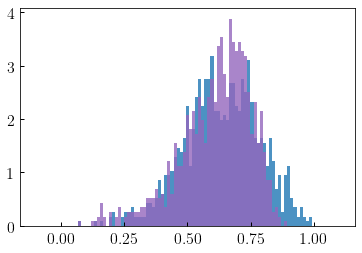

In [14]:
fig, ax = plt.subplots(1, 1)
rbins = np.linspace(-0.1, 1.1, 100)

mask = mass_mask3
__=ax.hist(halos['halo_b_to_a'][mask], bins=rbins, density=True, alpha=0.8, color=mblue)
__=ax.hist(halos['model_b_to_a'][mask], bins=rbins, density=True, alpha=0.8, color=mpurple)


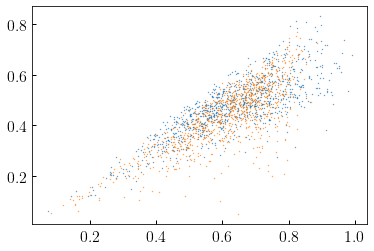

In [15]:
fig, ax = plt.subplots(1, 1)
mask = mass_mask3
__=ax.scatter(halos['halo_b_to_a'][mask], halos['halo_c_to_a'][mask], s=0.1)
__=ax.scatter(halos['model_b_to_a'][mask], halos['model_c_to_a'][mask], s=0.1)

In [ ]:
# halos['model_evec_norm'] = 1. + halos['model_b_to_a']**2 + halos['model_c_to_a']**2
# halos['model_ellipticity'] = (1. - halos['model_c_to_a']**2)/(2.*halos['model_evec_norm'])
# halos['model_prolaticity'] = (1. - 2*halos['model_b_to_a']**2 + halos['model_c_to_a']**2)/(
#     2.*halos['model_evec_norm'])


In [ ]:
fig, ax = plt.subplots(1, 1)
rbins = np.linspace(-0.1, 1.1, 100)

mask = mass_mask3
__=ax.hist(halos['ellipticity'][mask], bins=rbins, density=True, alpha=0.8, color=mblue)
__=ax.hist(halos['model_ellipticity'][mask], 
           bins=rbins, density=True, alpha=0.8, color=mpurple)


In [ ]:
fig, ax = plt.subplots(1, 1)
rbins = np.linspace(-0.1, 1.1, 100)

mask = mass_mask1
__=ax.hist(halos['prolaticity'][mask], bins=rbins, density=True, alpha=0.8, color=mblue)
__=ax.hist(halos['model_prolaticity'][mask], 
           bins=rbins, density=True, alpha=0.8, color=mpurple)


In [ ]:
halos['model_ellipticity'].min(), halos['model_ellipticity'].max()

In [ ]:
halos['model_prolaticity'].min(), halos['model_prolaticity'].max()